In [1]:
# 异常检测
# load the data
import pandas as pd
import numpy as np

data = pd.read_csv('anomaly_data.csv')
data.head()`

,x1,x2
0,8.046815,9.741152
1,8.408520,8.763270
2,9.195915,10.853181
3,9.914701,11.174260
4,8.576700,9.042849


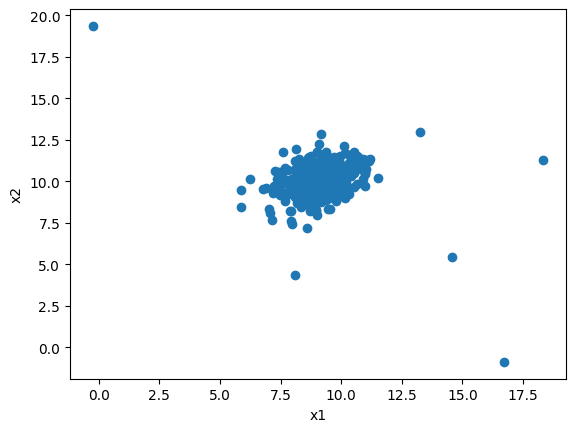

In [37]:
# visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data.loc[:, 'x1'], data.loc[:, 'x2'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

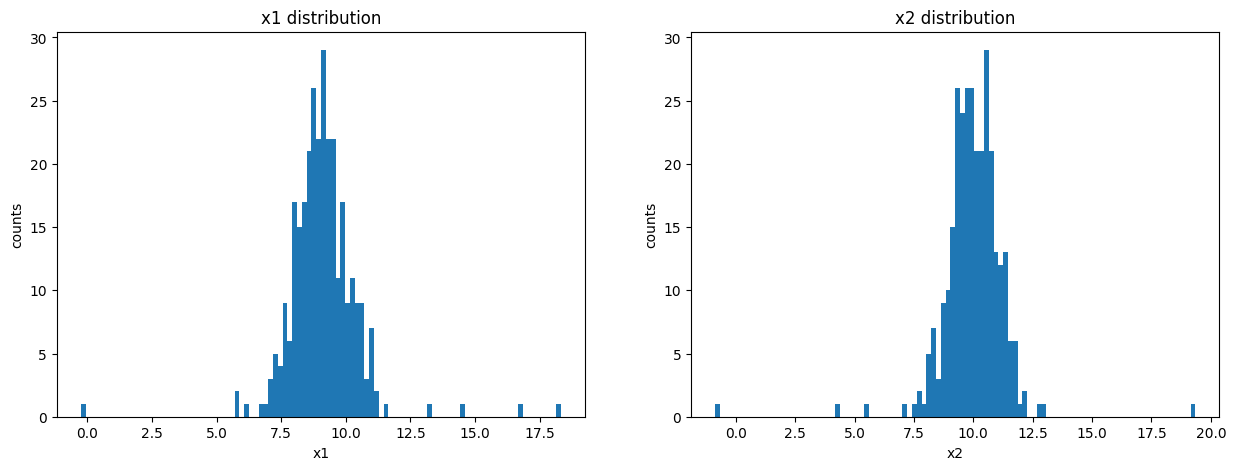

In [36]:
# define x1 and x2
x1 = data.loc[:, 'x1']
x2 = data.loc[:, 'x2']

fig2 = plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(x1, bins=100)
plt.title('x1 distribution')
plt.xlabel('x1')
plt.ylabel('counts')

plt.subplot(122)
plt.hist(x2, bins=100)
plt.title('x2 distribution')
plt.xlabel('x2')
plt.ylabel('counts')

plt.show()

In [35]:
# calculate the mean and sigma of x1 and x2
# 计算它们的均值和标准差（概率论）
x1_mean = x1.mean()
x1_sigma = x1.std()
x2_mean = x2.mean()
x2_sigma = x2.std()
print(x1_mean, x1_sigma, x2_mean, x2_sigma)

9.112225783931596 1.3559573758220915 9.997710507954398 1.30970711753864


In [34]:
# calculate the gaussian distribution(normal distribution)
from scipy.stats import norm
x1_range = np.linspace(0, 20, 300)
# pdf = probability distribution function
x1_normal = norm.pdf(x1_range, x1_mean, x1_sigma)

x2_range = np.linspace(0, 20, 300)
x2_normal = norm.pdf(x2_range, x2_mean, x2_sigma)

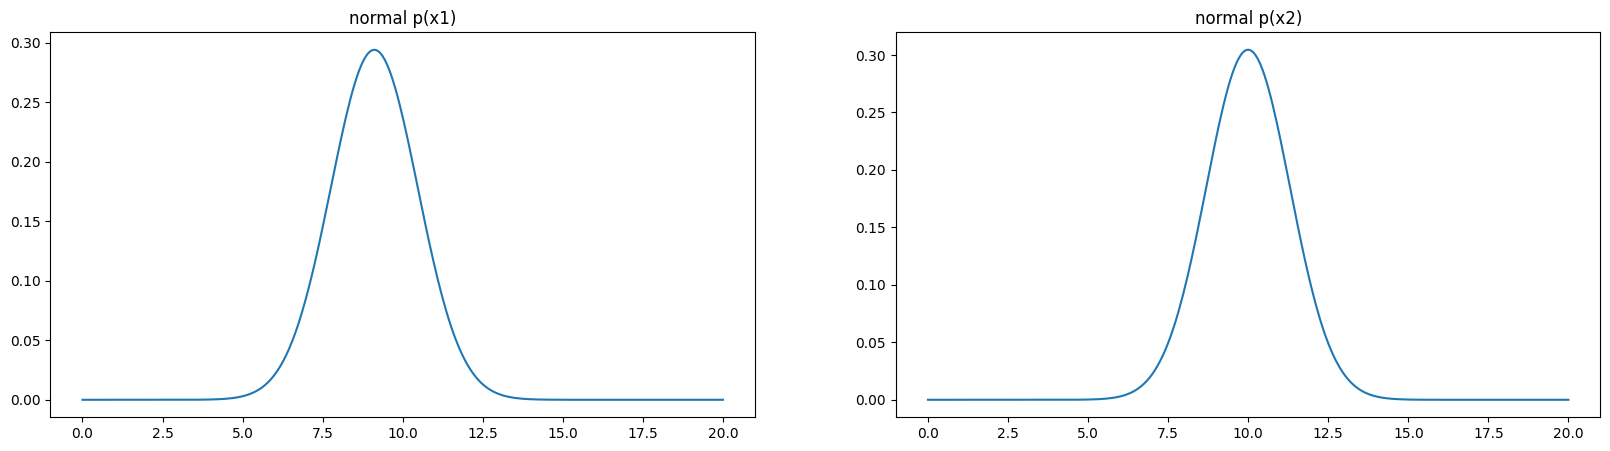

In [33]:
# visualized the p(x)
fig2 = plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(x1_range, x1_normal)
plt.title('normal p(x1)')

plt.subplot(122)
plt.plot(x2_range, x2_normal)
plt.title('normal p(x2)')

plt.show()

In [42]:
# establish the model and predict
from sklearn.covariance import EllipticEnvelope
# contamination 参数控制灵敏度（越高越严格）
ad_model = EllipticEnvelope(contamination=0.1)
ad_model.fit(data)

EllipticEnvelope(contamination=0.02)

In [44]:
# make prediction
y_predict = ad_model.predict(data)
print(pd.value_counts(y_predict))

 1    300
-1      7
Name: count, dtype: int64


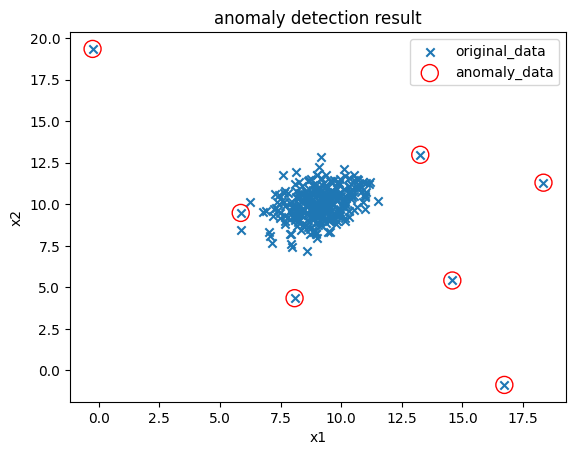

In [45]:
# visualize results
fig4 = plt.figure()
original_data = plt.scatter(data.loc[:, 'x1'], data.loc[:, 'x2'], marker='x')
anomaly_data = plt.scatter(data.loc[:, 'x1'][y_predict==-1], data.loc[:, 'x2'][y_predict==-1], marker='o', facecolor='none', edgecolor='red', s=150)
plt.title('anomaly detection result')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((original_data, anomaly_data), ('original_data', 'anomaly_data'))
plt.show()